In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import math
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import scipy
from scipy.stats import spearmanr
from decimal import Decimal

GenGB2017 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_GB_20170101-20171231.csv")

GenGB2017 = GenGB2017.replace('n/e', np.NaN)
GenGB2017 = GenGB2017.replace('N/A', np.NaN)



GenGB2017 = pd.DataFrame({'Date': GenGB2017.iloc[:,1],
                          'SP': GenGB2017.iloc[:,2],
                          'Wind [MW]': GenGB2017.iloc[:,7],
                          'PSH [MW]': GenGB2017.iloc[:,8],
                          'Hydro [MW]': GenGB2017.iloc[:,9],
                          'Nuclear [MW]': GenGB2017.iloc[:,6],
                          'Gas [MW]': GenGB2017.iloc[:,3]+GenGB2017.iloc[:,10],
                          'Oil [MW]': GenGB2017.iloc[:,4],
                          'Coal [MW]': GenGB2017.iloc[:,5],
                          'Biomass [MW]': GenGB2017.iloc[:,16]})

print(GenGB2017.to_string())

             Date    SP  Wind [MW]  PSH [MW]  Hydro [MW]  Nuclear [MW]  Gas [MW]  Oil [MW]  Coal [MW]  Biomass [MW]
0      20170101.0   1.0     3923.0         0         944          7404      7727         0     3815.0           0.0
1      20170101.0   2.0     3658.0        16         909          7403      8338         0     3815.0           0.0
2      20170101.0   3.0     3925.0         0         864          7408      7927         0     3801.0           0.0
3      20170101.0   4.0     4393.0         0         863          7407      6996         0     3803.0           0.0
4      20170101.0   5.0     4418.0         0         860          7316      6897         0     3705.0           0.0
5      20170101.0   6.0     4329.0         0         846          7193      6580         0     3380.0           0.0
6      20170101.0   7.0     4442.0         0         841          7172      5897         0     3285.0           0.0
7      20170101.0   8.0     4692.0         0         832          7175  

In [15]:


def function():
    result = []
    for i in range(0, len(GenGB2017.iloc[:,0])):
        if i < 84:
            start = 48*i
            end = 48*(i+1)
            day = GenGB2017.iloc[start,0]
            opWi = sum(GenGB2017.iloc[start:end,2])/2
            opPS = sum(GenGB2017.iloc[start:end,3])/2
            opHy = sum(GenGB2017.iloc[start:end,4])/2
            opNu = sum(GenGB2017.iloc[start:end,5])/2
            opGa = sum(GenGB2017.iloc[start:end,6])/2
            opOi = sum(GenGB2017.iloc[start:end,7])/2
            opCo = sum(GenGB2017.iloc[start:end,8])/2
            opBi = sum(GenGB2017.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
        elif i == 84: # For some reason this day does not show in the DataFrame
            start = 48*i
            end = 4077
            day = GenGB2017.iloc[start,0]
            opWi = sum(GenGB2017.iloc[start:end,2])/2
            opPS = sum(GenGB2017.iloc[start:end,3])/2
            opHy = sum(GenGB2017.iloc[start:end,4])/2
            opNu = sum(GenGB2017.iloc[start:end,5])/2
            opGa = sum(GenGB2017.iloc[start:end,6])/2
            opOi = sum(GenGB2017.iloc[start:end,7])/2
            opCo = sum(GenGB2017.iloc[start:end,8])/2
            opBi = sum(GenGB2017.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
        elif 85 <= i < 301:
            start = 48*i-2
            end = 48*(i+1)-2
            day = GenGB2017.iloc[start,0]
            opWi = sum(GenGB2017.iloc[start:end,2])/2
            opPS = sum(GenGB2017.iloc[start:end,3])/2
            opHy = sum(GenGB2017.iloc[start:end,4])/2
            opNu = sum(GenGB2017.iloc[start:end,5])/2
            opGa = sum(GenGB2017.iloc[start:end,6])/2
            opOi = sum(GenGB2017.iloc[start:end,7])/2
            opCo = sum(GenGB2017.iloc[start:end,8])/2
            opBi = sum(GenGB2017.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
        elif i == 301:
            start = 48*i
            end = 14495
            day = GenGB2017.iloc[start,0]
            opWi = sum(GenGB2017.iloc[start:end,2])/2
            opPS = sum(GenGB2017.iloc[start:end,3])/2
            opHy = sum(GenGB2017.iloc[start:end,4])/2
            opNu = sum(GenGB2017.iloc[start:end,5])/2
            opGa = sum(GenGB2017.iloc[start:end,6])/2
            opOi = sum(GenGB2017.iloc[start:end,7])/2
            opCo = sum(GenGB2017.iloc[start:end,8])/2
            opBi = sum(GenGB2017.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
        elif 301 <= i < 365:
            start = 48*i
            end = 48*(i+1)
            day = GenGB2017.iloc[start,0]
            opWi = sum(GenGB2017.iloc[start:end,2])/2
            opPS = sum(GenGB2017.iloc[start:end,3])/2
            opHy = sum(GenGB2017.iloc[start:end,4])/2
            opNu = sum(GenGB2017.iloc[start:end,5])/2
            opGa = sum(GenGB2017.iloc[start:end,6])/2
            opOi = sum(GenGB2017.iloc[start:end,7])/2
            opCo = sum(GenGB2017.iloc[start:end,8])/2
            opBi = sum(GenGB2017.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
    df = pd.DataFrame(result, columns=['Day','Wind [MWh]','PSH [MWh]', 'Hydro [MWh]', 'Nuclear [MWh]', 'Gas [MWh]',
                                       'Oil [MWh]', 'Coal [MWh]', 'Biomass [MWh]'])
    return df

GBGen2017 = function().round(2)
GBGen2017["Day"] = pd.date_range(start="1/1/2017", periods=365, freq="D")
print(GBGen2017.to_string()) # CHECKED

           Day  Wind [MWh]  PSH [MWh]  Hydro [MWh]  Nuclear [MWh]  Gas [MWh]  Oil [MWh]  Coal [MWh]  Biomass [MWh]
0   2017-01-01    122495.5     6754.0      23061.5       175921.0   233093.5        0.0     84838.0            0.0
1   2017-01-02     80163.0     8151.0      21571.0       181329.0   354081.0        0.0     95301.5            0.0
2   2017-01-03    143024.0     6269.0      20342.5       178719.0   382011.0        0.0    120114.5            0.0
3   2017-01-04    100267.5     7884.0      21110.5       177204.0   448000.0        0.0    134462.5            0.0
4   2017-01-05     49537.0    10512.0      22328.5       177484.0   507241.5        0.0    145779.5            0.0
5   2017-01-06     87407.0    10276.0      21539.0       177676.5   470387.5        0.0    143562.5            0.0
6   2017-01-07     29134.5     9293.0      19301.5       169256.0   452365.0        0.0    133793.0            0.0
7   2017-01-08     38323.0     7240.0      18656.0       181680.5   411852.5    

In [16]:
GenGB2018 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_GB_20180101-20181231.csv")

GenGB2018 = GenGB2018.replace('n/e', np.NaN)
GenGB2018 = GenGB2018.replace('N/A', np.NaN)

GenGB2018 = pd.DataFrame({'Date': GenGB2018.iloc[:,1],
                          'SP': GenGB2018.iloc[:,2],
                          'Wind [MW]': GenGB2018.iloc[:,7],
                          'PSH [MW]': GenGB2018.iloc[:,8],
                          'Hydro [MW]': GenGB2018.iloc[:,9],
                          'Nuclear [MW]': GenGB2018.iloc[:,6],
                          'Gas [MW]': GenGB2018.iloc[:,3]+GenGB2018.iloc[:,10],
                          'Oil [MW]': GenGB2018.iloc[:,4],
                          'Coal [MW]': GenGB2018.iloc[:,5],
                          'Biomass [MW]': GenGB2018.iloc[:,16]})

print(GenGB2018.to_string())

           Date  SP  Wind [MW]  PSH [MW]  Hydro [MW]  Nuclear [MW]  Gas [MW]  Oil [MW]  Coal [MW]  Biomass [MW]
0      20180101   1       8596         0         353          7267      5361         0       1237           749
1      20180101   2       8750         0         353          7265      5739         0       1404           756
2      20180101   3       8631         0         350          7263      5885         0       1525           756
3      20180101   4       8595         0         346          7258      5355         0       1589           755
4      20180101   5       8437         0         339          7257      5089         0       1571           752
5      20180101   6       8400         0         324          7253      4748         0       1558           754
6      20180101   7       8410         0         281          7255      4459         0       1594           757
7      20180101   8       8188         0         279          7258      3807         0       1555       

In [17]:
def function():
    result = []
    for i in range(0, len(GenGB2018.iloc[:,0])):
        if i < 83:
            start = 48*i
            end = 48*(i+1)
            day = GenGB2018.iloc[start,0]
            opWi = sum(GenGB2018.iloc[start:end,2])/2
            opPS = sum(GenGB2018.iloc[start:end,3])/2
            opHy = sum(GenGB2018.iloc[start:end,4])/2
            opNu = sum(GenGB2018.iloc[start:end,5])/2
            opGa = sum(GenGB2018.iloc[start:end,6])/2
            opOi = sum(GenGB2018.iloc[start:end,7])/2
            opCo = sum(GenGB2018.iloc[start:end,8])/2
            opBi = sum(GenGB2018.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
        elif i == 83: # For some reason this day does not show in the DataFrame
            start = 48*i
            end = 4030
            day = GenGB2018.iloc[start,0]
            opWi = sum(GenGB2018.iloc[start:end,2])/2
            opPS = sum(GenGB2018.iloc[start:end,3])/2
            opHy = sum(GenGB2018.iloc[start:end,4])/2
            opNu = sum(GenGB2018.iloc[start:end,5])/2
            opGa = sum(GenGB2018.iloc[start:end,6])/2
            opOi = sum(GenGB2018.iloc[start:end,7])/2
            opCo = sum(GenGB2018.iloc[start:end,8])/2
            opBi = sum(GenGB2018.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
        elif 84 <= i < 300:
            start = 48*i-2
            end = 48*(i+1)-2
            day = GenGB2018.iloc[start,0]
            opWi = sum(GenGB2018.iloc[start:end,2])/2
            opPS = sum(GenGB2018.iloc[start:end,3])/2
            opHy = sum(GenGB2018.iloc[start:end,4])/2
            opNu = sum(GenGB2018.iloc[start:end,5])/2
            opGa = sum(GenGB2018.iloc[start:end,6])/2
            opOi = sum(GenGB2018.iloc[start:end,7])/2
            opCo = sum(GenGB2018.iloc[start:end,8])/2
            opBi = sum(GenGB2018.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
        elif i == 300:
            start = 48*i-2
            end = 14448
            day = GenGB2018.iloc[start,0]
            opWi = sum(GenGB2018.iloc[start:end,2])/2
            opPS = sum(GenGB2018.iloc[start:end,3])/2
            opHy = sum(GenGB2018.iloc[start:end,4])/2
            opNu = sum(GenGB2018.iloc[start:end,5])/2
            opGa = sum(GenGB2018.iloc[start:end,6])/2
            opOi = sum(GenGB2018.iloc[start:end,7])/2
            opCo = sum(GenGB2018.iloc[start:end,8])/2
            opBi = sum(GenGB2018.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
        elif 301 <= i < 365:
            start = 48*i
            end = 48*(i+1)
            day = GenGB2018.iloc[start,0]
            opWi = sum(GenGB2018.iloc[start:end,2])/2
            opPS = sum(GenGB2018.iloc[start:end,3])/2
            opHy = sum(GenGB2018.iloc[start:end,4])/2
            opNu = sum(GenGB2018.iloc[start:end,5])/2
            opGa = sum(GenGB2018.iloc[start:end,6])/2
            opOi = sum(GenGB2018.iloc[start:end,7])/2
            opCo = sum(GenGB2018.iloc[start:end,8])/2
            opBi = sum(GenGB2018.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
    df = pd.DataFrame(result, columns=['Day','Wind [MWh]','PSH [MWh]', 'Hydro [MWh]', 'Nuclear [MWh]', 'Gas [MWh]',
                                       'Oil [MWh]', 'Coal [MWh]', 'Biomass [MWh]'])
    return df

GBGen2018 = function().round(2)
GBGen2018["Day"] = pd.date_range(start="1/1/2018", periods=365, freq="D")

GBGen2018.iloc[85, 1:] = GBGen2018.iloc[85, 1:]/2

print(GBGen2018.to_string())

           Day  Wind [MWh]  PSH [MWh]  Hydro [MWh]  Nuclear [MWh]  Gas [MWh]  Oil [MWh]  Coal [MWh]  Biomass [MWh]
0   2018-01-01   170170.50     7296.0     11031.50      174232.50  239284.50        0.0     39153.5       17982.00
1   2018-01-02   161347.00     7008.0     10587.00      174291.00  367489.50        0.0     52220.5       16715.00
2   2018-01-03   191869.00     6192.0     11345.00      169233.50  355366.00        0.0     29945.5       16052.00
3   2018-01-04   122467.50     5735.0     10900.00      169340.00  446705.00        0.0     53031.5       15891.00
4   2018-01-05    63319.50     7680.0     10827.50      163336.50  475746.00        0.0     98884.0       16841.00
5   2018-01-06   140352.50     7336.0      9715.50      158916.00  375017.50        0.0     34009.5       17132.00
6   2018-01-07   124078.50     6619.0      8452.50      169250.00  371231.00        0.0     51898.0       16930.50
7   2018-01-08   170927.00     8616.0      8551.50      181364.50  422391.50    

In [18]:
GenGB2019 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_GB_20190101-20191231.csv")

GenGB2019 = GenGB2019.replace('n/e', np.NaN)
GenGB2019 = GenGB2019.replace('N/A', np.NaN)

GenGB2019 = pd.DataFrame({'Date': GenGB2019.iloc[:,1],
                          'SP': GenGB2019.iloc[:,2],
                          'Wind [MW]': GenGB2019.iloc[:,7],
                          'PSH [MW]': GenGB2019.iloc[:,8],
                          'Hydro [MW]': GenGB2019.iloc[:,9],
                          'Nuclear [MW]': GenGB2019.iloc[:,6],
                          'Gas [MW]': GenGB2019.iloc[:,3]+GenGB2019.iloc[:,10],
                          'Oil [MW]': GenGB2019.iloc[:,4],
                          'Coal [MW]': GenGB2019.iloc[:,5],
                          'Biomass [MW]': GenGB2019.iloc[:,16]})

print(GenGB2019.to_string())

           Date  SP  Wind [MW]  PSH [MW]  Hydro [MW]  Nuclear [MW]  Gas [MW]  Oil [MW]  Coal [MW]  Biomass [MW]
0      20190101   1       9236         0         405          6924      5853         0          0          1052
1      20190101   2       9297        24         388          6838      6292         0          0          1040
2      20190101   3       9356         0         372          6834      5719         0          0          1026
3      20190101   4       9135         0         368          6830      5020         0          0          1022
4      20190101   5       8912         0         355          6827      4964         0          0          1018
5      20190101   6       8966         0         341          6832      5113         0          0          1017
6      20190101   7       8722         0         323          6814      5148         0          0          1014
7      20190101   8       8705         0         356          6802      4729         0          0       

In [19]:
def function():
    result = []
    for i in range(0, len(GenGB2019.iloc[:,0])):
        if i < 89:
            start = 48*i
            end = 48*(i+1)
            day = GenGB2019.iloc[start,0]
            opWi = sum(GenGB2019.iloc[start:end,2])/2
            opPS = sum(GenGB2019.iloc[start:end,3])/2
            opHy = sum(GenGB2019.iloc[start:end,4])/2
            opNu = sum(GenGB2019.iloc[start:end,5])/2
            opGa = sum(GenGB2019.iloc[start:end,6])/2
            opOi = sum(GenGB2019.iloc[start:end,7])/2
            opCo = sum(GenGB2019.iloc[start:end,8])/2
            opBi = sum(GenGB2019.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
        elif i == 89: # For some reason this day does not show in the DataFrame
            start = 48*i
            end = 4318
            day = GenGB2019.iloc[start,0]
            opWi = sum(GenGB2019.iloc[start:end,2])/2
            opPS = sum(GenGB2019.iloc[start:end,3])/2
            opHy = sum(GenGB2019.iloc[start:end,4])/2
            opNu = sum(GenGB2019.iloc[start:end,5])/2
            opGa = sum(GenGB2019.iloc[start:end,6])/2
            opOi = sum(GenGB2019.iloc[start:end,7])/2
            opCo = sum(GenGB2019.iloc[start:end,8])/2
            opBi = sum(GenGB2019.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
        elif 90 <= i < 299:
            start = 48*i-2
            end = 48*(i+1)-2
            day = GenGB2019.iloc[start,0]
            opWi = sum(GenGB2019.iloc[start:end,2])/2
            opPS = sum(GenGB2019.iloc[start:end,3])/2
            opHy = sum(GenGB2019.iloc[start:end,4])/2
            opNu = sum(GenGB2019.iloc[start:end,5])/2
            opGa = sum(GenGB2019.iloc[start:end,6])/2
            opOi = sum(GenGB2019.iloc[start:end,7])/2
            opCo = sum(GenGB2019.iloc[start:end,8])/2
            opBi = sum(GenGB2019.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
        elif i == 299:
            start = 48*i-2
            end = 14400
            day = GenGB2019.iloc[start,0]
            opWi = sum(GenGB2019.iloc[start:end,2])/2
            opPS = sum(GenGB2019.iloc[start:end,3])/2
            opHy = sum(GenGB2019.iloc[start:end,4])/2
            opNu = sum(GenGB2019.iloc[start:end,5])/2
            opGa = sum(GenGB2019.iloc[start:end,6])/2
            opOi = sum(GenGB2019.iloc[start:end,7])/2
            opCo = sum(GenGB2019.iloc[start:end,8])/2
            opBi = sum(GenGB2019.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
        elif 300 <= i < 365:
            start = 48*i
            end = 48*(i+1)
            day = GenGB2019.iloc[start,0]
            opWi = sum(GenGB2019.iloc[start:end,2])/2
            opPS = sum(GenGB2019.iloc[start:end,3])/2
            opHy = sum(GenGB2019.iloc[start:end,4])/2
            opNu = sum(GenGB2019.iloc[start:end,5])/2
            opGa = sum(GenGB2019.iloc[start:end,6])/2
            opOi = sum(GenGB2019.iloc[start:end,7])/2
            opCo = sum(GenGB2019.iloc[start:end,8])/2
            opBi = sum(GenGB2019.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
    df = pd.DataFrame(result, columns=['Day','Wind [MWh]','PSH [MWh]', 'Hydro [MWh]', 'Nuclear [MWh]', 'Gas [MWh]',
                                       'Oil [MWh]', 'Coal [MWh]', 'Biomass [MWh]'])
    return df

GBGen2019 = function().round(2)
GBGen2019["Day"] = pd.date_range(start="1/1/2019", periods=365, freq="D")

GBGen2019.iloc[85, 1:] = GBGen2019.iloc[85, 1:]/2

print(GBGen2019.to_string())

           Day  Wind [MWh]  PSH [MWh]  Hydro [MWh]  Nuclear [MWh]  Gas [MWh]  Oil [MWh]  Coal [MWh]  Biomass [MWh]
0   2019-01-01   149902.50     4865.0      12082.0       157804.5   279089.0        0.0     14819.0       27874.50
1   2019-01-02    51206.50     9951.0      13312.5       143334.0   485560.0        0.0     65793.5       48995.50
2   2019-01-03    32815.50     8979.0      12045.0       140359.5   537242.5        0.0     96854.5       53010.00
3   2019-01-04    57755.00     4617.0      10003.0       146371.5   534930.5        0.0     67354.0       53316.50
4   2019-01-05    64502.00     7907.0      10708.0       147244.5   485940.5        0.0     33781.0       37809.50
5   2019-01-06    39799.00     7359.0      11835.0       146451.0   470349.0        0.0     45723.0       33458.50
6   2019-01-07   246754.50     3125.0      10193.0       152280.0   316948.5        0.0     24688.0       43141.50
7   2019-01-08   222764.00     7907.0      11647.0       161442.0   346609.5    

In [20]:
GBGen = pd.concat([GBGen2017["Wind [MWh]"], GBGen2018["Wind [MWh]"], GBGen2019["Wind [MWh]"]], ignore_index=True).to_frame("Wind [MWh]")
GBGen["PSH [MWh]"] = pd.concat([GBGen2017["PSH [MWh]"], GBGen2018["PSH [MWh]"], GBGen2019["PSH [MWh]"]], ignore_index=True).to_frame("PSH [MWh]")
GBGen["Hydro [MWh]"] = pd.concat([GBGen2017["Hydro [MWh]"], GBGen2018["Hydro [MWh]"], GBGen2019["Hydro [MWh]"]], ignore_index=True).to_frame("Hydro [MWh]")
GBGen["Nuclear [MWh]"] = pd.concat([GBGen2017["Nuclear [MWh]"], GBGen2018["Nuclear [MWh]"], GBGen2019["Nuclear [MWh]"]], ignore_index=True).to_frame("Nuclear [MWh]")
GBGen["Gas [MWh]"] = pd.concat([GBGen2017["Gas [MWh]"], GBGen2018["Gas [MWh]"], GBGen2019["Gas [MWh]"]], ignore_index=True).to_frame("Gas [MWh]")
GBGen["Oil [MWh]"] = pd.concat([GBGen2017["Oil [MWh]"], GBGen2018["Oil [MWh]"], GBGen2019["Oil [MWh]"]], ignore_index=True).to_frame("Oil [MWh]")
GBGen["Coal [MWh]"] = pd.concat([GBGen2017["Coal [MWh]"], GBGen2018["Coal [MWh]"], GBGen2019["Coal [MWh]"]], ignore_index=True).to_frame("Coal [MWh]")
GBGen["Biomass [MWh]"] = pd.concat([GBGen2017["Biomass [MWh]"], GBGen2018["Biomass [MWh]"], GBGen2019["Biomass [MWh]"]], ignore_index=True).to_frame("Biomass [MWh]")

GBGen["Date"] = pd.date_range(start="1/1/2017", periods=1095, freq="D")

NewOrder = ["Date", "Wind [MWh]", "PSH [MWh]", "Hydro [MWh]", "Nuclear [MWh]",
            "Gas [MWh]", "Oil [MWh]", "Coal [MWh]", "Biomass [MWh]"]

GBGen = pd.DataFrame(GBGen)

GBGen = GBGen.reindex(columns=NewOrder)

print(GBGen.dtypes)

Date             datetime64[ns]
Wind [MWh]              float64
PSH [MWh]               float64
Hydro [MWh]             float64
Nuclear [MWh]           float64
Gas [MWh]               float64
Oil [MWh]               float64
Coal [MWh]              float64
Biomass [MWh]           float64
dtype: object


In [24]:
list = ["Wind", "PSH", "Hydro", "Nuclear", 
        "Gas", "Oil", "Coal", "Biomass"]

GBGenpc = pd.DataFrame()

for i in list:
    GBGenpc[f"{i} 1"] = GBGen2017[f"{i} [MWh]"]
    GBGenpc[f"{i} 2"] = GBGen2018[f"{i} [MWh]"]
    GBGenpc[f"{i} 3"] = GBGen2019[f"{i} [MWh]"]
    GBGenpc[f"{i} Mean [MWh]"] = GBGenpc.loc[:, [f"{i} 1",f"{i} 2",f"{i} 3"]].mean(axis = 1).round(1)
    GBGenpc[f"{i} Max [MWh]"] = GBGenpc.loc[:, [f"{i} 1",f"{i} 2",f"{i} 3"]].max(axis = 1)
    GBGenpc[f"{i} Min [MWh]"] = GBGenpc.loc[:, [f"{i} 1",f"{i} 2",f"{i} 3"]].min(axis = 1)
    del GBGenpc[f"{i} 1"], GBGenpc[f"{i} 2"], GBGenpc[f"{i} 3"]

GBGenpc = pd.concat([GBGenpc.iloc[:,:], GBGenpc.iloc[:,:]], ignore_index=True)

print(GBGenpc.to_string())

%store GBGenpc

     Wind Mean [MWh]  Wind Max [MWh]  Wind Min [MWh]  PSH Mean [MWh]  PSH Max [MWh]  PSH Min [MWh]  Hydro Mean [MWh]  Hydro Max [MWh]  Hydro Min [MWh]  Nuclear Mean [MWh]  Nuclear Max [MWh]  Nuclear Min [MWh]  Gas Mean [MWh]  Gas Max [MWh]  Gas Min [MWh]  Oil Mean [MWh]  Oil Max [MWh]  Oil Min [MWh]  Coal Mean [MWh]  Coal Max [MWh]  Coal Min [MWh]  Biomass Mean [MWh]  Biomass Max [MWh]  Biomass Min [MWh]
0           147522.8       170170.50        122495.5          6305.0         7296.0         4865.0           15391.7          23061.5         11031.50            169319.3           175921.0           157804.5        250489.0       279089.0      233093.50             0.0            0.0            0.0          46270.2         84838.0         14819.0             15285.5           27874.50                0.0
1            97572.2       161347.00         51206.5          8370.0         9951.0         7008.0           15156.8          21571.0         10587.00            166318.0           181

Date             datetime64[ns]
Wind [MWh]              float64
PSH [MWh]               float64
Hydro [MWh]             float64
Nuclear [MWh]           float64
Gas [MWh]               float64
Oil [MWh]               float64
Coal [MWh]              float64
Biomass [MWh]           float64
dtype: object
Choose generation type:Nuclear
(-10316.25, 216641.25)
Choose y limit:220000


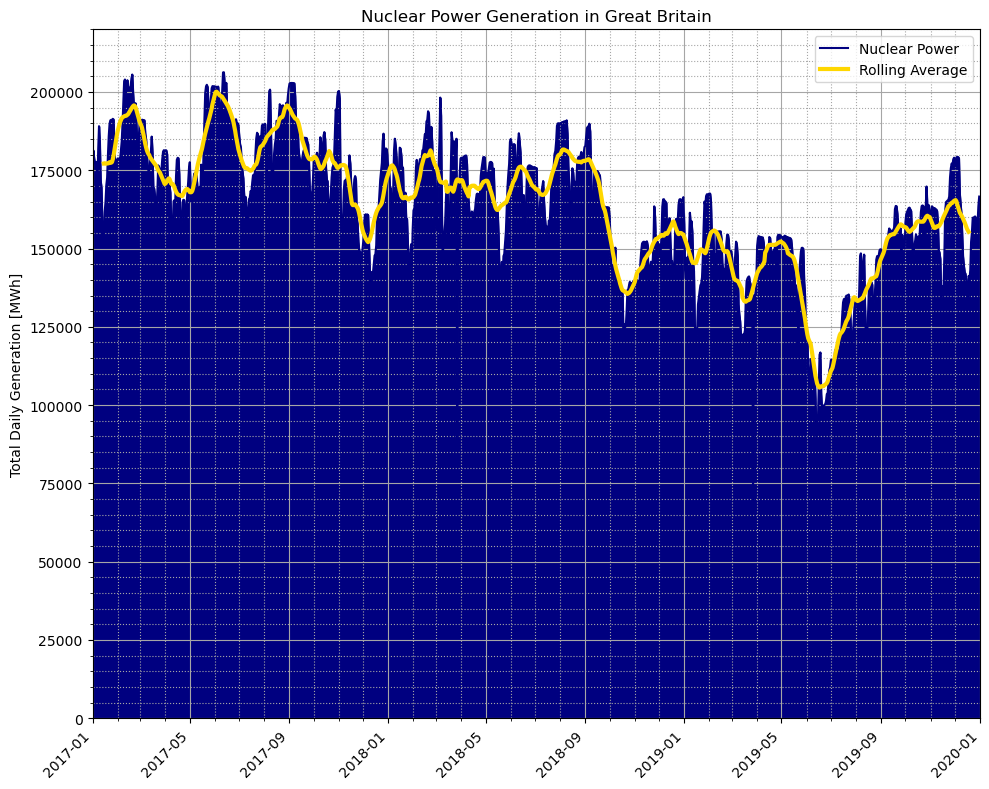

In [22]:
GBGen = pd.concat([GBGen2017["Wind [MWh]"], GBGen2018["Wind [MWh]"], GBGen2019["Wind [MWh]"]], ignore_index=True).to_frame("Wind [MWh]")
GBGen["PSH [MWh]"] = pd.concat([GBGen2017["PSH [MWh]"], GBGen2018["PSH [MWh]"], GBGen2019["PSH [MWh]"]], ignore_index=True).to_frame("PSH [MWh]")
GBGen["Hydro [MWh]"] = pd.concat([GBGen2017["Hydro [MWh]"], GBGen2018["Hydro [MWh]"], GBGen2019["Hydro [MWh]"]], ignore_index=True).to_frame("Hydro [MWh]")
GBGen["Nuclear [MWh]"] = pd.concat([GBGen2017["Nuclear [MWh]"], GBGen2018["Nuclear [MWh]"], GBGen2019["Nuclear [MWh]"]], ignore_index=True).to_frame("Nuclear [MWh]")
GBGen["Gas [MWh]"] = pd.concat([GBGen2017["Gas [MWh]"], GBGen2018["Gas [MWh]"], GBGen2019["Gas [MWh]"]], ignore_index=True).to_frame("Gas [MWh]")
GBGen["Oil [MWh]"] = pd.concat([GBGen2017["Oil [MWh]"], GBGen2018["Oil [MWh]"], GBGen2019["Oil [MWh]"]], ignore_index=True).to_frame("Oil [MWh]")
GBGen["Coal [MWh]"] = pd.concat([GBGen2017["Coal [MWh]"], GBGen2018["Coal [MWh]"], GBGen2019["Coal [MWh]"]], ignore_index=True).to_frame("Coal [MWh]")
GBGen["Biomass [MWh]"] = pd.concat([GBGen2017["Biomass [MWh]"], GBGen2018["Biomass [MWh]"], GBGen2019["Biomass [MWh]"]], ignore_index=True).to_frame("Biomass [MWh]")

GBGen["Date"] = pd.date_range(start="1/1/2017", periods=1095, freq="D")

NewOrder = ["Date", "Wind [MWh]", "PSH [MWh]", "Hydro [MWh]", "Nuclear [MWh]",
            "Gas [MWh]", "Oil [MWh]", "Coal [MWh]", "Biomass [MWh]"]

GBGen = pd.DataFrame(GBGen)

GBGen = GBGen.reindex(columns=NewOrder)

print(GBGen.dtypes)


######################################################################################################################

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

a = input("Choose generation type:", )

plt.title(f"{a} Power Generation in Great Britain")
plt.ylabel('Total Daily Generation [MWh]')

ax.plot(GBGen["Date"], GBGen[f"{a} [MWh]"], color="navy", label=f"{a} Power")
ax.plot(GBGen["Date"], GBGen[f"{a} [MWh]"].rolling(28,  center=True).mean(), linewidth = 3, color = "gold", label="Rolling Average")
plt.fill_between(GBGen["Date"], GBGen[f"{a} [MWh]"], color="navy")

plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_ylim())
b = input("Choose y limit:", )

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(17167, 18262)
plt.ylim(0,int(b))
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()